In [65]:
%matplotlib inline

from PIL import Image
from numpy import *
import sklearn
import skimage
import numpy as np
import sys
from matplotlib import pyplot as plt
from skimage import data, io
from scipy import signal
from scipy.ndimage import median_filter, gaussian_filter, prewitt
import cv2
import copy

from utils import read_img_mono
from descriptor_matching_template import extract_patch_descriptors, match_descriptors

In [2]:
plt.gray()

<Figure size 640x480 with 0 Axes>

In [3]:
#show an image in a cell
def show_img(img_array:list):
    print(f'Shape: {img_array.shape}')
    plt.imshow(img_array)
    plt.show()
def load_image(path):
    #to obtain grayscale image from RGB
    img = array(Image.open(path).convert(mode='L')) 
    return img

# Part 1: Harris Detector Implementation

Shape: (800, 1200)


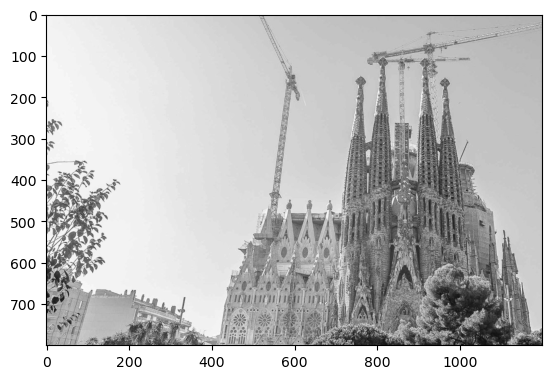

In [4]:
# load the image

# compute the Harris keypoints
#      1. get requistite gradients using convolution
#      2. Compute Harris matrix at each point
#      3. Harris score at each point
#      4. Threshold the score to obtain the keypoint detections

#plot them on the image
img_original = load_image('res/1.jpg')
show_img(img_original)

In [47]:
img = copy.deepcopy(img_original)

#blur with Gaussian
img_smoothed = gaussian_filter(img, sigma = 0.2)
img_smoothed = cv2.GaussianBlur(img, ksize = (3, 3), sigmaX = 0.2)

#Sobel derivative kernels
Mx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
My = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# get the gradient matrices
Ix = cv2.filter2D(img_smoothed, -1, Mx)
Iy = cv2.filter2D(img_smoothed, -1, My)

Ixx = Ix**2
Iyy = Iy**2
Ixy = Ix *Iy

# smooth the gradient matrices by bigger Gaussian kernels
Ixx_smoothed = cv2.GaussianBlur(Ixx, (5, 5), sigmaX = 0.2)
Iyy_smoothed = cv2.GaussianBlur(Iyy, (5, 5), sigmaX = 0.2)
Ixy_smoothed = cv2.GaussianBlur(Ixy, (5, 5), sigmaX = 0.2)

# computing the scale of interest for each point
R = []
alpha = 0.05
for r in range(0, img.shape[0]):
    for c in range(0, img.shape[1]):
        ixx = Ixx[r][c]
        iyy = Iyy[r][c]
        ixy = Ixy[r][c]
        
        M = np.array([[ixx, ixy], [ixy, iyy]])
        r_score = np.linalg.det(M) - alpha*(np.trace(M)**2)
        
        R.append(r_score)

# Part 2: Descriptor matching

In [62]:
# dilate results for marking corder
dst = cv2.cornerHarris(img, 3, 3, 0.05)
dst[]

In [80]:
M = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
key_point = [[1,1]]

pix = []
for (x, y) in key_point:
    pix.append(M[x-1:x+2, y-1:y+2])

In [81]:
M

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [82]:
pix

[array([[ 1,  2,  3],
        [ 5,  6,  7],
        [ 9, 10, 11]])]